# Sparks Foundation Task 6 

## Prediction Using Decision Tree Algorithm 

Create a Decision Tree Classifier and visualize it

The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

## Author:- Trisha Sharma 

## Data Science and Business Analytics Intern May'21

In [21]:
#Importing multiple library to read,analysed and visualized the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

## Getting the Data  

In [3]:
#Reading the Iris.csv file 
Iris_data = pd.read_csv('Iris.csv')
#Checking top 10 records of Dataset..
Iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#Basic Information regarding data
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [5]:
#Describe function gives the basic numerical info about data for each numeric feature..
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Data points count value for each class labels..
Iris_data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

As we saw that each classes has equal number of data points then our Iris data said to be Balanced dataset. No Class is fully dominating in our dataset.

## Defining Decision Tree

In [8]:
#Here we separating independent varibles or target varibles from Iris dataset
X = Iris_data[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = Iris_data['Species']
#Before training the model we have split our data into 
#Actual Train and Actual Test Dataset for training and validating purpose...
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)
#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)
#Now we have create a Decision tree classifier and trained it with training dataset.
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

DecisionTreeClassifier()

## Visualizing Decision Tree 

[Text(418.5, 1009.5428571428572, 'X[3] <= 0.8\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(279.0, 854.2285714285715, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(558.0, 854.2285714285715, 'X[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(279.0, 698.9142857142858, 'X[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(139.5, 543.6, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(418.5, 543.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(837.0, 698.9142857142858, 'X[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(697.5, 543.6, 'X[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(558.0, 388.28571428571433, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(837.0, 388.28571428571433, 'X[2] <= 4.9\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(697.5, 232.97142857142865, 'X[1] <= 3.1\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(558.0, 77.65714285714284, 'gini = 0.0

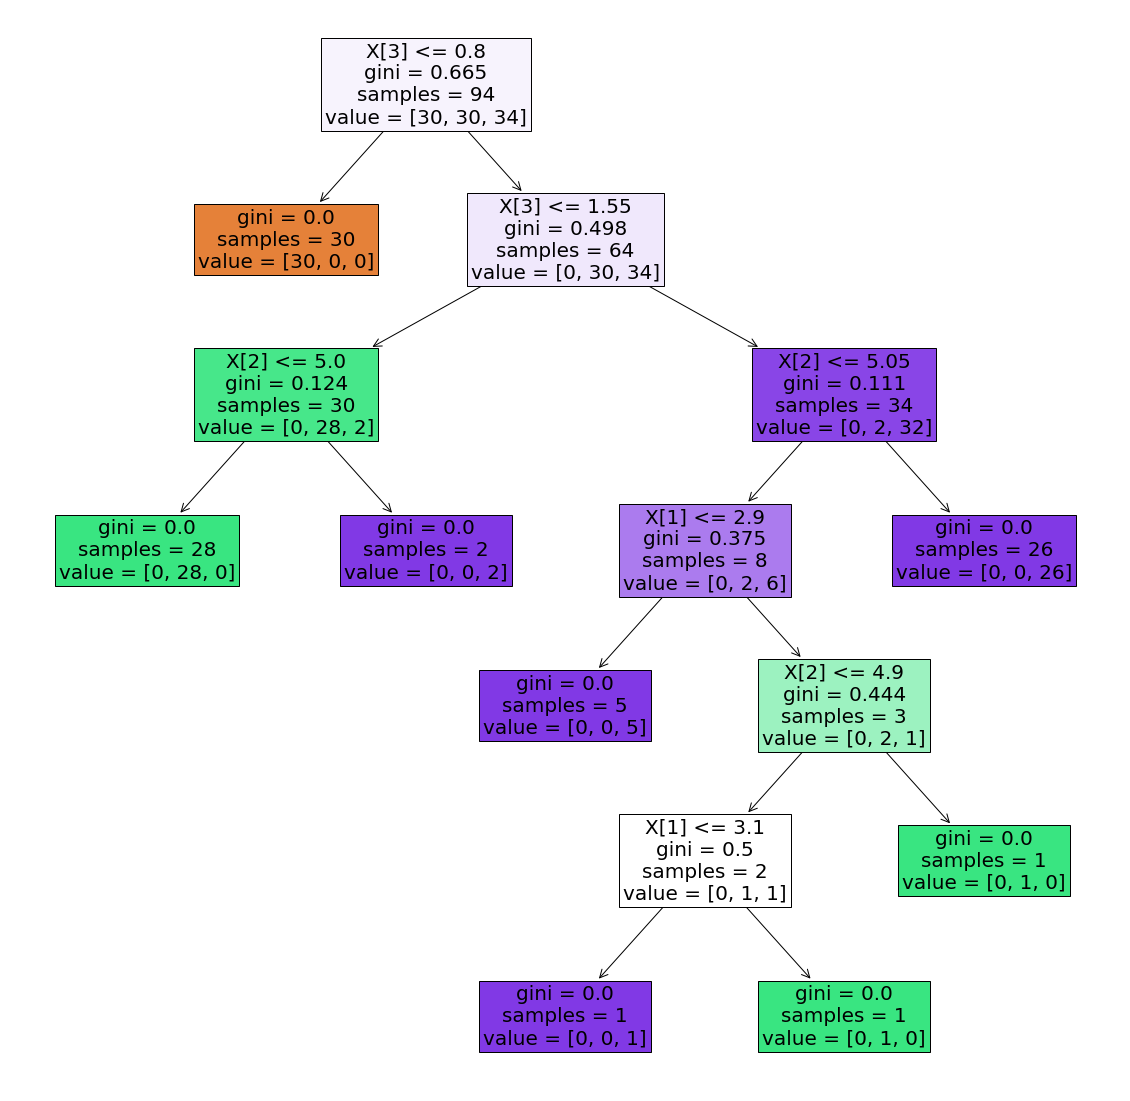

In [20]:
#Visualized the Tree which is formed on train dataset
plt.figure(figsize=(20,20))
tree.plot_tree(Iris_clf, filled=True,
              fontsize=20)

## Validating Decision Tree 

In [22]:
# As our model has been trained....
#Now we can validate our Decision tree using cross validation method 
#to get the accuracy or performance score of our model.
print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

#Checking validation test data on our trained model and getting performance metrices
Y_hat = Iris_clf.predict(Xcv)
print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Accuracy score is: 0.9361559139784946
Accuracy score for validation test data is: 0.8181818181818182
Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int32)

As we know our selected feature are working well and model gives very good accuracy score on validate or actual test data.
So Now we can trained our model on Actual train dataset with selected features for evaluating/ deploying our model in real world cases.

## Training Model on Actual Data

In [23]:
#Training model on Actual train data... 
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

## Final Decision Tree

[Text(837.0, 1494.8999999999999, 'X[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(708.2307692307693, 1223.1, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(965.7692307692308, 1223.1, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(515.0769230769231, 951.3, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(257.53846153846155, 679.4999999999999, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(128.76923076923077, 407.6999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(386.3076923076923, 407.6999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(772.6153846153846, 679.4999999999999, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(643.8461538461538, 407.6999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(901.3846153846155, 407.6999999999998, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(772.6153846153846, 

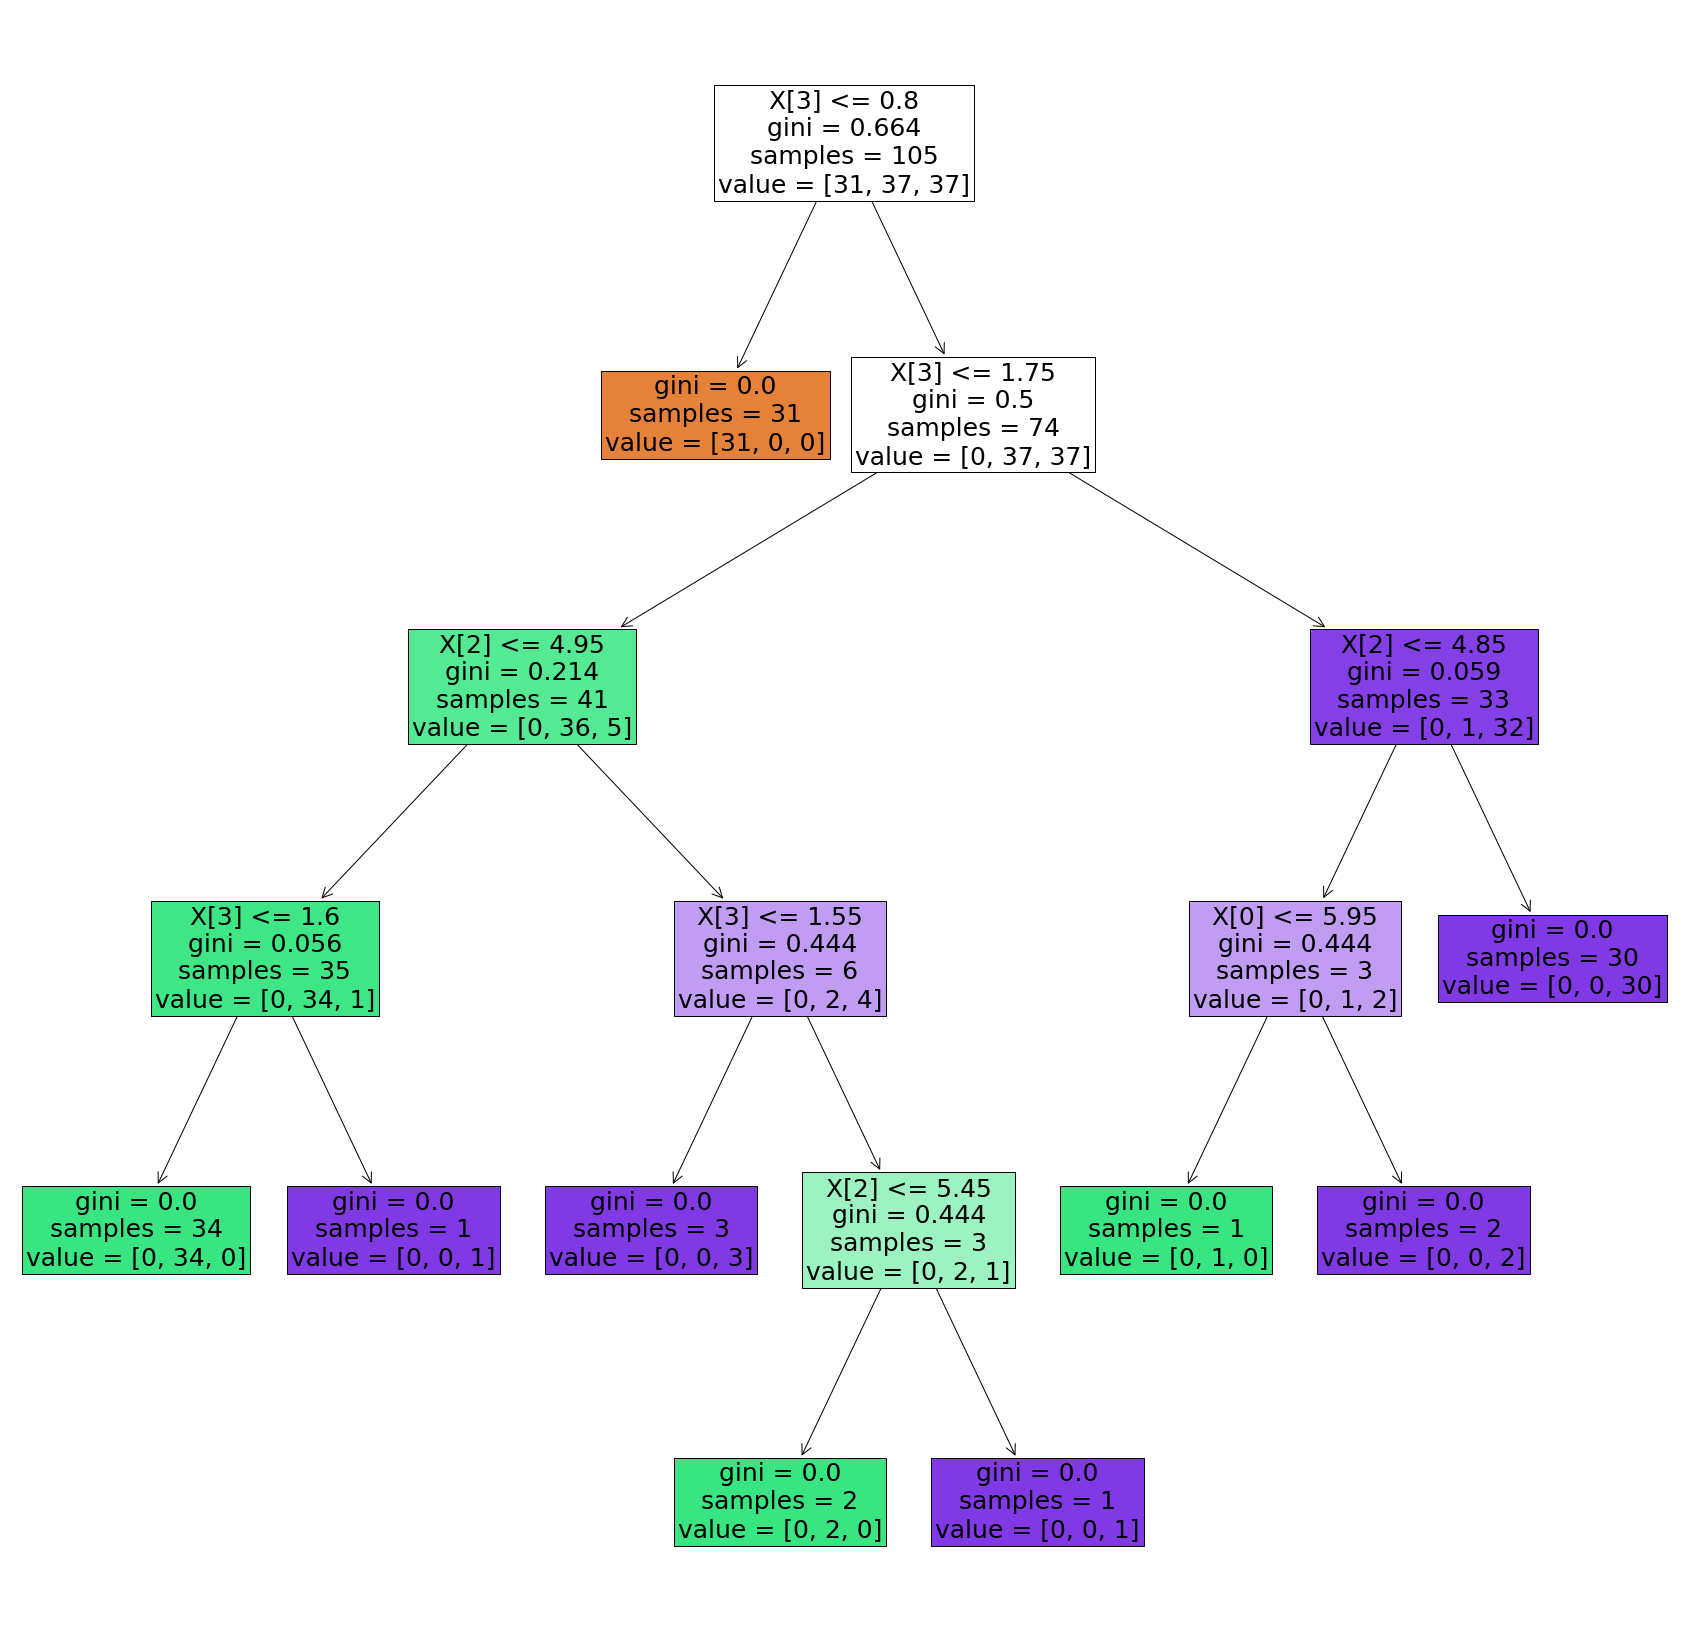

In [28]:
#Visualized the Tree which is formed on train dataset
plt.figure(figsize=(30,30))
tree.plot_tree(Iris_Fclf, filled=True,
              fontsize=25)

## Checking the performance of model on Actual Test data 

In [29]:
YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int32)

## Testing for New Points except data 

In [34]:
Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(Iris_Fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']
